In [57]:
import numpy as num
import pandas as pd
from matplotlib import pyplot as plt
import os
import urllib
from urllib import request
import scipy
from scipy import stats as stats
import datetime as dt
url = "https://covid19.who.int/WHO-COVID-19-global-data.csv"
file_path = os.path.join("data", "covid")
os.makedirs(file_path, exist_ok=True)
csv_path = os.path.join(file_path, "WHO-COVID19-global-data.csv")
urllib.request.urlretrieve(url, csv_path)
df = pd.read_csv(csv_path)
df['Date_reported'] = pd.to_datetime(df['Date_reported'])
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
168739,2021-12-10,ZW,Zimbabwe,AFRO,5189,155817,3,4723
168740,2021-12-11,ZW,Zimbabwe,AFRO,6181,161998,6,4729
168741,2021-12-12,ZW,Zimbabwe,AFRO,3004,165002,6,4735
168742,2021-12-13,ZW,Zimbabwe,AFRO,2138,167140,3,4738


In [58]:
gr_df = (df.loc[df['Country'] == 'Greece'])
gr_df.pop('Country_code')
gr_df.pop('Country')
gr_df.pop('WHO_region')
gr_df.pop('Cumulative_cases')
gr_df.pop('Cumulative_deaths')
gr_df

,Date_reported,New_cases,New_deaths
57672,2020-01-03,0,0
57673,2020-01-04,0,0
57674,2020-01-05,0,0
57675,2020-01-06,0,0
57676,2020-01-07,0,0
...,...,...,...
58379,2021-12-10,5513,81
58380,2021-12-11,5087,103
58381,2021-12-12,4751,72
58382,2021-12-13,3225,91


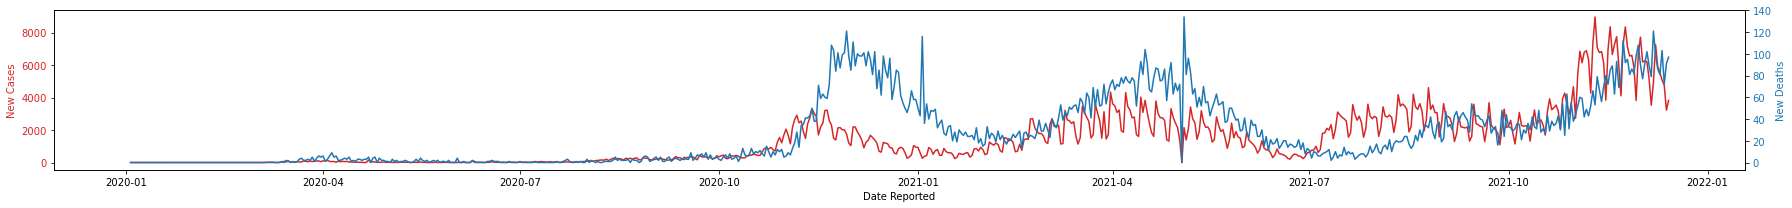

In [59]:
fig = plt.figure(figsize=(25,3))
ax1 = fig.subplots()


color = 'tab:red'
ax1.set_xlabel('Date Reported')
ax1.set_ylabel('New Cases', color=color)
ax1.plot('Date_reported', 'New_cases', color=color,data=gr_df)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('New Deaths', color=color)
ax2.plot('Date_reported', 'New_deaths', color=color,data=gr_df)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()
plt.show()
#fig, ax = plt.subplots(2,1, sharex=True)
#ax[0].plot('Date_reported','New_cases',data=gr_df)
#ax[1].plot('Date_reported','New_deaths',data=gr_df)
#plt.show()